In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
ridership = pd.read_csv('data/ridership_detail.csv')
ridership.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,...,date,year,month,day,weekday,week,quarter,hour,year-month,year-week
0,2022-08-04 04:00:00,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,...,2022-08-04,2022,8,4,3,31,3,4,2022-08,2022-08-01/2022-08-07
1,2023-02-13 03:00:00,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,...,2023-02-13,2023,2,13,0,7,1,3,2023-02,2023-02-13/2023-02-19
2,2023-03-08 04:00:00,H007,1 Av (L),M,L,omny,4,0,40.730953,-73.981628,...,2023-03-08,2023,3,8,2,10,1,4,2023-03,2023-03-06/2023-03-12
3,2023-03-23 03:00:00,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,...,2023-03-23,2023,3,23,3,12,1,3,2023-03,2023-03-20/2023-03-26
4,2023-04-03 05:00:00,H007,1 Av (L),M,L,omny,28,0,40.730953,-73.981628,...,2023-04-03,2023,4,3,0,14,2,5,2023-04,2023-04-03/2023-04-09


In [3]:
ridership['transit_timestamp'] = pd.to_datetime(ridership['transit_timestamp'])

In [4]:
ridership_total = ridership.groupby(['transit_timestamp', 'station_complex_id'])['ridership'].sum().reset_index()
ridership_total.head()

,transit_timestamp,station_complex_id,ridership
0,2022-02-01,A002,376
1,2022-02-01,A006,98
2,2022-02-01,A010,232
3,2022-02-01,A013,200
4,2022-02-01,A022,772


In [5]:
ridership_total['hour'] = ridership_total['transit_timestamp'].dt.hour
ridership_total.head()

,transit_timestamp,station_complex_id,ridership,hour
0,2022-02-01,A002,376,0
1,2022-02-01,A006,98,0
2,2022-02-01,A010,232,0
3,2022-02-01,A013,200,0
4,2022-02-01,A022,772,0


In [6]:
# calculate the avg and std of ridership for each hour
ridership_total['log_ridership'] = np.log(ridership_total['ridership'])
ridership_log_mean_std = ridership_total.groupby(['hour', 'station_complex_id'])['log_ridership'].agg(['mean', 'std']).reset_index()
ridership_log_mean_std.head()

,hour,station_complex_id,mean,std
0,0,A002,6.028669,0.568265
1,0,A006,4.372418,1.014253
2,0,A010,5.871791,0.624717
3,0,A013,5.844293,0.657778
4,0,A022,6.987467,0.644861


In [7]:
stations = pd.read_csv('data/stations.csv')
stations_detail = ridership_log_mean_std.merge(stations, on='station_complex_id')
stations_detail.head()

,hour,station_complex_id,mean,std,station_complex,borough,routes,latitude,longitude,Georeference
0,0,A002,6.028669,0.568265,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461)
1,1,A002,4.919597,0.643627,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461)
2,2,A002,4.139030,0.668990,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461)
3,3,A002,3.769149,0.620026,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461)
4,4,A002,4.068159,0.515268,"Lexington Av (N,R,W)/59 St (4,5,6)",M,"5,N,R,4,,W,6",40.762661,-73.967255,POINT (-73.96725463867188 40.76266098022461)


In [8]:
global_mean = ridership_total['log_ridership'].mean()
station_mean = ridership_total.groupby('station_complex_id')['log_ridership'].mean().reset_index()
station_mean.columns = ['station_complex_id', 'value']
station_mean.head()

,station_complex_id,value
0,A002,6.689487
1,A006,5.161132
2,A010,6.324080
3,A013,6.007060
4,A022,7.561838


In [9]:
global_station_mean_std = station_mean['value'].std()
global_station_mean_mean = station_mean['value'].mean()
print(global_station_mean_std, global_station_mean_mean)

0.9304404970224894 4.836637936604022


In [10]:
staion_hour_mean = ridership_total.groupby(['station_complex_id', 'hour'])['log_ridership'].mean().reset_index()
staion_hour_mean.columns = ['station_complex_id', 'hour', 'value']
staion_hour_mean.head()

,station_complex_id,hour,value
0,A002,0,6.028669
1,A002,1,4.919597
2,A002,2,4.139030
3,A002,3,3.769149
4,A002,4,4.068159


In [11]:
staion_hour_mean_std = staion_hour_mean.groupby('station_complex_id')['value'].std().reset_index()
staion_hour_mean_std.columns = ['station_complex_id', 'value']
staion_hour_mean_std.head()

,station_complex_id,value
0,A002,1.407499
1,A006,1.803841
2,A010,1.411682
3,A013,1.373362
4,A022,1.274974


In [12]:
stations_detail.to_csv('data/stations_detail.csv', index=False)

In [13]:
global_mean_std = stations_detail['mean'].std()
global_mean_mean = stations_detail['mean'].mean()

def get_station_hour_price_factor(demand, station_complex_id, station_mean=station_mean, staion_hour_mean_std=staion_hour_mean_std, 
                                  global_mean=global_station_mean_mean, global_std = global_station_mean_std, ratio=1, beta = 0.05):
    log_demand = np.log(demand)
    
    spec_station_hour_mean_std = staion_hour_mean_std[staion_hour_mean_std['station_complex_id'] == station_complex_id]['value'].values[0]
    spec_station_hour_mean = station_mean[station_mean['station_complex_id'] == station_complex_id]['value'].values[0]
    
    global_factor = np.exp( (beta / ratio) * (spec_station_hour_mean - global_mean) / global_std)
    station_factor = np.exp( (beta) * (log_demand - spec_station_hour_mean) / spec_station_hour_mean_std)
    
    final_factor = global_factor * station_factor * ratio
    return final_factor

get_station_hour_price_factor(10, 'A002')

0.9452820160028395

In [14]:
calculate_data = (station_mean, staion_hour_mean_std, global_station_mean_mean, global_station_mean_std)

# dump to pickle
import pickle
with open('data/calculate_data.pkl', 'wb') as f:
    pickle.dump(calculate_data, f)

In [15]:
stations_detail = pd.read_csv('data/stations_detail.csv')
stations_cluster = pd.read_csv('data/stations_cluster.csv')

In [16]:
test_day = pd.datetime(2023, 5, 1, 12, 0, 0)

# choose 100 stations to test
test_stations = stations_detail.sample(100)['station_complex_id'].values
test_stations

array(['R129', 'B025', 'N338B', 'N520', 'R632', 'S102', 'N525', 'R106',
       'R524', 'N340A', 'N035', 'B009', 'R422', 'R641', 'R402', 'R252',
       'R325', 'R621', 'R287', 'R123', 'J037', 'R633', 'E009', 'N114',
       'R624', 'N184', 'N121B', 'N525', 'R238', 'R331', 'N539A', 'H006',
       'R406', 'B026', 'N183', 'A030', 'N119', 'N500', 'N195', 'R186',
       'N333A', 'R228', 'R188', 'H035', 'R259', 'E011', 'R533', 'R624',
       'C023', 'N422', 'H013', 'N134', 'R404', 'N191', 'N181', 'R332',
       'N419', 'N529', 'N414', 'J024', 'R406', 'C012', 'C018', 'R256',
       'J012', 'B009', 'N017', 'R331', 'R249', 'H035', 'E014', 'N604',
       'R636', 'N209', 'A069', 'H019', 'J030', 'R637', 'K019', 'R621',
       'N305', 'E004', 'N322', 'H040', 'R621', 'J009', 'N100', 'R328',
       'N037', 'R287', 'R532', 'D002', 'R550', 'R178', 'H039', 'R217',
       'R309', 'N056', 'N701', 'H017'], dtype=object)

Process

- predict the next hour's demand using arima(2,2) based on past 72 hours' data
- give a price factor using get_station_hour_price_factor()

In [17]:
def get_last_72_hour_seq(station_complex_id, time_stamp, df):
    try:
        time_stamp = pd.to_datetime(time_stamp)
        df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
        three_days = pd.Timedelta(days=3)
        two_days_prior = time_stamp - three_days
        df_station = df[df['station_complex_id'] == station_complex_id]
        df_station_2days = df_station[(df_station['transit_timestamp'] >= two_days_prior) & (df_station['transit_timestamp'] < time_stamp)]
        df_station_2days.sort_values('transit_timestamp', ascending=True, inplace=True)
        return df_station_2days['ridership'].values
    except:
        return np.nan

In [18]:
station = test_stations[0]
past_seq = get_last_72_hour_seq(station, test_day, ridership_total)

arima222 = ARIMA(past_seq, order=(2,2,2)).fit()
predict_demand = arima222.forecast()[0]
predict_demand

134.61036237634605

In [19]:
def get_actual_ridership(station_complex_id, time_stamp, df):
    try:
        time_stamp = pd.to_datetime(time_stamp)
        df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])
        df_station = df[df['station_complex_id'] == station_complex_id]
        df_station_time = df_station[df_station['transit_timestamp'] == time_stamp]
        return df_station_time['ridership'].values[0]
    except:
        return np.nan
    
actual_ridership = get_actual_ridership(station, test_day, ridership_total)
actual_ridership

217

In [20]:
price_factor = get_station_hour_price_factor(predict_demand, station, *calculate_data, ratio=1)
price_factor

1.002428401076862

In [21]:
import random
def get_customer_ride_intendency(actual_ridership, price_factor, tourist_percent=0.01, alpha = 0.1):
    tot = 0
    # if random.random() < tourist_percent:
    #         return 1
    #     else:
    #         if price_factor < 1:
    #             return 1
    #         else:
    #             return np.exp(-alpha * (price_factor - 1))
    # sum them up by ridership times. Find a faster way to do this
    for i in range(actual_ridership):
        if random.random() < tourist_percent:
            tot += 1
        else:
            if price_factor < 1:
                tot += 1
            else:
                prob = np.exp(-alpha * (price_factor - 1))
                if random.random() < prob:
                    tot += 1
                else:
                    pass
    # return an integer by rounding
    tot = int(round(tot))
    return tot
        

In [22]:
get_customer_ride_intendency(62, 1.1, 0.05)

60

In [23]:
def cluster_pricing_simulation(test_stations, test_day, ridership_total, calculate_data, stations_cluster, 
                               tourist_percent = 0.01, alpha = 0.1, ratio=1, beta=0.05):
    
    # get the clusters of the test stations
    test_stations_cluster = stations_cluster[stations_cluster['station_complex_id'].isin(test_stations)]
    
    # get the past_seq for each station
    for station in test_stations:
        past_seq = get_last_72_hour_seq(station, test_day, ridership_total)
        arima222 = ARIMA(past_seq, order=(2,2,2)).fit()
        predict_demand = arima222.forecast()[0]
        actual_ridership = get_actual_ridership(station, test_day, ridership_total)
        price_factor = get_station_hour_price_factor(predict_demand, station, *calculate_data, ratio=ratio, beta=beta)

        # output predict_demand, actual_ridership, price_factor into the dataframe
        test_stations_cluster.loc[test_stations_cluster['station_complex_id'] == station, 'predict_demand'] = predict_demand
        test_stations_cluster.loc[test_stations_cluster['station_complex_id'] == station, 'actual_ridership'] = actual_ridership
        test_stations_cluster.loc[test_stations_cluster['station_complex_id'] == station, 'price_factor'] = price_factor
        
    # calculate a mean price_factor for each cluster
    test_stations_cluster['mean_price_factor'] = test_stations_cluster.groupby('cluster')['price_factor'].transform('mean')
    
    # calculate the ride_intendency for each station
    test_stations_cluster['cluster_ride_intendency'] = test_stations_cluster.apply(lambda x: get_customer_ride_intendency(int(x['actual_ridership']), x['mean_price_factor'], tourist_percent, alpha), axis=1)
    
    # no cluster ride_intendency
    test_stations_cluster['no_cluster_ride_intendency'] = test_stations_cluster.apply(lambda x: get_customer_ride_intendency(int(x['actual_ridership']), x['price_factor'], tourist_percent, alpha), axis=1)
    
    # calculate the base_revenue
    base_revenue = test_stations_cluster['actual_ridership'].sum() * 2.9
    
    # calculate revenue by for each row ride_intendency * 2.9 * price_factor and sum them up
    test_stations_cluster['cluster_revenue'] = test_stations_cluster['cluster_ride_intendency'] * 2.9 * test_stations_cluster['price_factor']
    test_stations_cluster['no_cluster_revenue'] = test_stations_cluster['no_cluster_ride_intendency'] * 2.9 * test_stations_cluster['price_factor']
    
    cluster_revenue = test_stations_cluster['cluster_revenue'].sum()
    no_cluster_revenue = test_stations_cluster['no_cluster_revenue'].sum()

    return base_revenue, cluster_revenue,no_cluster_revenue, test_stations_cluster

In [197]:
base_revenue, cluster_revenue,no_cluster_revenue,test_stations_cluster = cluster_pricing_simulation(test_stations, test_day, ridership_total, calculate_data, stations_cluster)

In [198]:
base_revenue, cluster_revenue,no_cluster_revenue

(86840.5, 92653.0028395705, 92481.586686948)

In [199]:
test_stations_cluster.to_csv('data/test_stations_cluster.csv', index=False)

In [24]:
# run experiment for alpha = 0.1, 0.2, 0.3, 0.4, 0.5

for alpha in [0.2, 0.4, 0.8, 1.2]:
    print('alpha = ', alpha)
    base_revenue, cluster_revenue,no_cluster_revenue,test_stations_cluster = cluster_pricing_simulation(test_stations, test_day, ridership_total, calculate_data, stations_cluster, alpha=alpha)
    print('base_revenue: ', base_revenue)
    print('cluster_revenue: ', cluster_revenue)
    print('no_cluster_revenue: ', no_cluster_revenue)
    print('------------------')

alpha =  0.2
base_revenue:  90596.0
cluster_revenue:  96025.0386219908
no_cluster_revenue:  95840.79445570661
------------------
alpha =  0.4
base_revenue:  90596.0
cluster_revenue:  94929.5275515665
no_cluster_revenue:  94238.74602797766
------------------
alpha =  0.8
base_revenue:  90596.0
cluster_revenue:  92742.5858132488
no_cluster_revenue:  91836.09631112238
------------------
alpha =  1.2
base_revenue:  90596.0
cluster_revenue:  90381.4414938503
no_cluster_revenue:  88857.27445089791
------------------


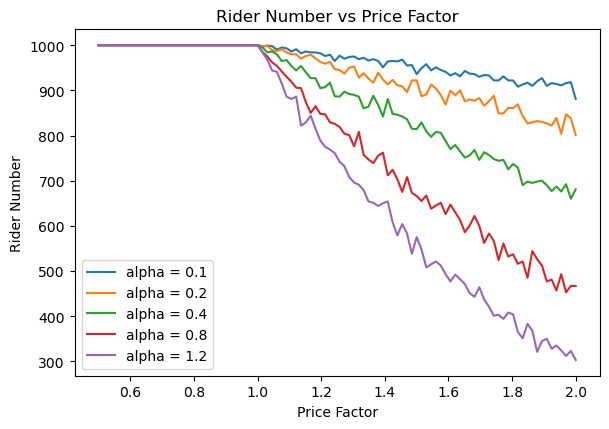

In [243]:
# Plot get_customer_ride_intendency function vs price_factor under different alpha

def get_customer_ride_intendency_plot(alpha_lst):
    alpha_num = len(alpha_lst)
    fig, ax = plt.subplots(figsize=(6, 4))
    for i in range(alpha_num):
        alpha = alpha_lst[i]
        x = np.linspace(0.5, 2, 100)
        y = []
        for x_i in x:
            y.append(get_customer_ride_intendency(1000, x_i, alpha=alpha))
        plt.plot(x, y, label='alpha = {}'.format(alpha), color='C{}'.format(i))
    
    plt.tight_layout()
    plt.ylabel('Rider Number')
    plt.xlabel('Price Factor')
    plt.title('Rider Number vs Price Factor')
    plt.legend()
    plt.show()

get_customer_ride_intendency_plot([0.1, 0.2, 0.4, 0.8, 1.2])

In [212]:
def get_price_factor(global_sd, station_sd, ratio=1, beta = 0.05):
    global_factor = np.exp( (beta / ratio) * global_sd)
    station_factor = np.exp( (beta) * station_sd)
    
    final_factor = global_factor * station_factor * ratio
    return final_factor

In [231]:
global_sd_range = np.linspace(-3, 3, 100)
station_sd_range = np.linspace(-3, 3, 100)

# get a cartesian product of global_sd_range and station_sd_range and output to a dataframe
global_sd_range_df = pd.DataFrame(global_sd_range, columns=['global_sd'])
station_sd_range_df = pd.DataFrame(station_sd_range, columns=['station_sd'])
global_sd_range_df['key'] = 1
station_sd_range_df['key'] = 1

sd_df = global_sd_range_df.merge(station_sd_range_df, on='key')
sd_df.drop('key', axis=1, inplace=True)

In [241]:
sd_df['price_factor'] = sd_df.apply(lambda x: get_price_factor(x['global_sd'], x['station_sd'], ratio =1), axis=1)
sd_df.head()

,global_sd,station_sd,price_factor
0,-3.0,-3.000000,0.740818
1,-3.0,-2.939394,0.743067
2,-3.0,-2.878788,0.745322
3,-3.0,-2.818182,0.747584
4,-3.0,-2.757576,0.749852


In [242]:
# 3d plot using plotly

import plotly.express as px

fig = px.scatter_3d(sd_df, y='station_sd', x='global_sd', z='price_factor', color='price_factor')
# change figsize
fig.update_layout(width=600, height=600)
# change label
fig.update_layout(scene = dict(
                    xaxis_title='Global SD',
                    yaxis_title='Station SD',
                    zaxis_title='Price Factor'))

fig.show()



In [237]:
# get the price of all the stations at the test_day

test_day = pd.datetime(2023, 5, 1, 12, 0, 0)

test_stations = stations_detail['station_complex_id'].unique().tolist()

station_price = stations_detail.copy()

for station in test_stations:
    past_seq = get_last_72_hour_seq(station, test_day, ridership_total)
    arima222 = ARIMA(past_seq, order=(2,2,2)).fit()
    predict_demand = arima222.forecast()[0]
    price_factor = get_station_hour_price_factor(predict_demand, station, *calculate_data, ratio=1, beta=0.05)
    price = price_factor * 2.9
    station_price.loc[station_price['station_complex_id'] == station, 'price'] = price
    print('station: ', station, 'price: ', price)
    
station_price.to_csv('data/station_price.csv', index=False)


station:  A002 price:  3.2509693495820766
station:  A006 price:  3.0292085891103233
station:  A010 price:  3.167596422769758
station:  A013 price:  3.1287341338169465
station:  A022 price:  3.3689018135094178
station:  A027 price:  3.015439615255982
station:  A030 price:  3.078099977058446
station:  A034 price:  3.3743639746274807
station:  A038 price:  3.017872834246376
station:  A041 price:  3.0182465400228633
station:  A043 price:  3.2399310549289115
station:  A047 price:  2.913731148892708
station:  A054 price:  2.9102499156623143
station:  A064 price:  2.8232855729081554
station:  A069 price:  3.184487454345423
station:  A083 price:  2.8792946119265905
station:  B004 price:  3.0014942662192907
station:  B009 price:  2.729811250409078
station:  B013 price:  3.020096662362491
station:  B014 price:  2.91211185721837
station:  B016 price:  2.995142361292264
station:  B017 price:  2.8314453541313553
station:  B018 price:  2.939280165543434
station:  B019 price:  3.01514969080649
statio

In [26]:
station_price = pd.read_csv('data/station_price.csv')

In [28]:
# top 10 stations with highest price
station_price.sort_values('price', ascending=False)['station_complex'].unique()[:5]

array(['Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)',
       'Grand Central-42 St (S,4,5,6,7)',
       '14 St-Union Sq (L,N,Q,R,W,4,5,6)',
       '34 St-Herald Sq (B,D,F,M,N,Q,R,W)', 'Fulton St (A,C,J,Z,2,3,4,5)'],
      dtype=object)

In [29]:
station_price.sort_values('price', ascending=True)['station_complex'].unique()[:5]

array(['Broad Channel (A,S)', 'Beach 105 St (A,S)', 'Beach 98 St (A,S)',
       '21 St (G)', 'Beach 44 St (A)'], dtype=object)

In [239]:
# bottom 10 stations with lowest price
station_price.sort_values('price', ascending=True).head(10)

,hour,station_complex_id,mean,std,station_complex,borough,routes,latitude,longitude,Georeference,price
4072,16,N183,2.338574,0.739520,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682
4079,23,N183,0.839708,0.794734,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682
4078,22,N183,1.044206,0.832506,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682
4077,21,N183,1.252783,0.811936,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682
4076,20,N183,1.443535,0.889189,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682
4075,19,N183,1.609891,0.768380,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682
4074,18,N183,1.755188,0.861859,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682
4073,17,N183,2.163722,0.750576,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682
4071,15,N183,2.345297,0.720408,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682
4070,14,N183,2.157939,0.744729,"Broad Channel (A,S)",Q,"S,A",40.608383,-73.815926,POINT (-73.81592559814453 40.60838317871094),2.416682


(array([  72.,   24.,   24.,  168.,   96.,  384.,  576., 1728., 1536.,
        1440., 1392.,  984.,  768.,  456.,  312.,   72.,  144.,   24.,
           0.,   24.]),
 array([2.41668215, 2.47321256, 2.52974297, 2.58627338, 2.64280379,
        2.6993342 , 2.75586461, 2.81239502, 2.86892544, 2.92545585,
        2.98198626, 3.03851667, 3.09504708, 3.15157749, 3.2081079 ,
        3.26463831, 3.32116872, 3.37769914, 3.43422955, 3.49075996,
        3.54729037]),
 <BarContainer object of 20 artists>)

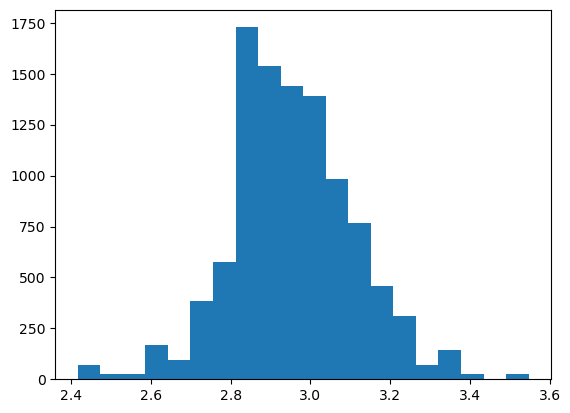

In [240]:
sns.displot(station_price['price'], kde=True)
plt.title('Price Distribution of All Stations for 2023/5/1, 12:00:00')